In [7]:
!pip install -U -q opendatasets opencv-python

In [55]:
import os
import glob
import random
import yaml

import cv2
import matplotlib.pyplot as plt
import opendatasets as od

In [3]:
od.download('https://www.kaggle.com/datasets/ultralytics/brain-tumor/data')

Dataset URL: https://www.kaggle.com/datasets/ultralytics/brain-tumor


100%|██████████| 4.19M/4.19M [00:00<00:00, 5.46MB/s]


In [24]:
base_dir = "./brain-tumor"

Image `./brain-tumor/brain-tumor/train/images/00245_101.jpg` has shape: (256, 192, 3)
Image `./brain-tumor/brain-tumor/train/images/00077_166.jpg` has shape: (512, 512, 3)
Image `./brain-tumor/brain-tumor/train/images/00144_243.jpg` has shape: (512, 512, 3)


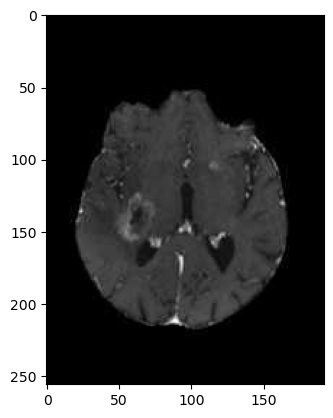

In [65]:
sample_dir = f"{base_dir}/brain-tumor/train/images"
sample_files = glob.glob(sample_dir + "/*.jpg")
samples = random.sample(sample_files, k=3)

sample_images = []
for sample in samples:
    image = cv2.imread(sample)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    sample_images.append(image)
    print(f"Image `{sample}` has shape: {image.shape}")

len(sample_images)

plt.imshow(sample_images[0])

In [101]:
def read_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    return image

def read_labels(label_dir, image_full_path): 
    labels = None
    
    (image_dir, image_path) = os.path.split(image_full_path) 
    (image_name, _ext) = os.path.splitext(image_path)

    label_path = os.path.join(label_dir, image_name + ".txt")
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            labels = f.read().split()
    
    return labels

def dir_to_data(directory):
    # directory = "./brain-tumor/brain-tumor/train"

    image_dir = os.path.join(directory, "images")
    label_dir = os.path.join(directory, "labels")

    image_paths = glob.glob(image_dir + "/*.jpg")#[:10]

    images = []
    labels = []
    for image_path in image_paths:
        image = read_image(image_path)
        labels = read_labels(label_dir, image_path)

        if len(image) > 0 and isinstance(labels, list):
            images.append(image)
            labels.append(labels)
    
    return data

data = dir_to_data("./brain-tumor/brain-tumor/train")
len(data)
data[0:5]

[(array([[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         ...,
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]]], dtype=uint8),
  ['1', '0.326291', '0.367371', '0.115023', '0.117371']),
 (array([[[0, 0, 0],
          [0, 0, 0],
 

In [76]:
os.path.split("./brain-tumor/brain-tumor/train/labels/68 (6).jpg.txt")

('./brain-tumor/brain-tumor/train/labels', '68 (6).jpg.txt')